### Functional Approximation of a normal Distribution

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
from scipy.stats import gaussian_kde, norm
import skfda
from skfda import FDataGrid

In [110]:
y=norm.rvs(size=5000)
df_describe = pd.DataFrame(y)
df_describe.describe()

,0
count,5000.000000
mean,0.000118
std,0.997211
min,-3.876188
25%,-0.660459
50%,0.011053
75%,0.671631
max,4.911281


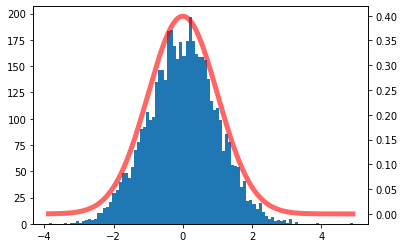

In [111]:
fig,ax=plt.subplots()
x = np.linspace(min(y),
                max(y), 5000)
ax2=ax.twinx()
ax2.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

n,bins,num=ax.hist(y,bins=100)

In [112]:
adj_n=n/sum(n)
prob=list(zip(bins,adj_n))
adj_bins=bins[:-1]+np.diff(bins)


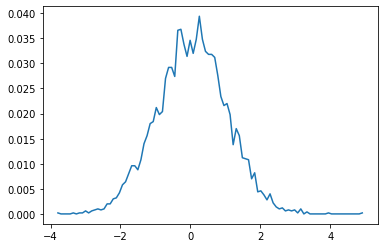

In [113]:
plt.plot(adj_bins,adj_n)

Functional Representation via polynomial interpolation
- Note the presence of unrealistic extrapolation and runge phenomenon 

In [114]:
fd = skfda.FDataGrid(data_matrix=adj_n, grid_points=adj_bins)

basis3 = skfda.representation.basis.Monomial(domain_range=(min(y),max(y)), n_basis=4)
smoother3 = skfda.preprocessing.smoothing.BasisSmoother(basis3,method='cholesky',return_basis=True,)
fd_basis3 = smoother3.fit_transform(fd)
coeff=fd_basis3.coefficients.round(2)[0]
print("Basis for Cubic Polynomial is",coeff)

basis8 =  skfda.representation.basis.Monomial(domain_range=(min(y),max(y)), n_basis=8)
smoother8= skfda.preprocessing.smoothing.BasisSmoother(basis8,method='cholesky',return_basis=True,)
fd_basis8 = smoother8.fit_transform(fd)
coeff8=fd_basis8.coefficients.round(2)[0]
print("Basis for Linear Polynomial is",coeff8)

basis16 =  skfda.representation.basis.Monomial(domain_range=(min(y),max(y)), n_basis=16)
smoother16= skfda.preprocessing.smoothing.BasisSmoother(basis16,method='cholesky',return_basis=True,)
fd_basis16 = smoother16.fit_transform(fd)
coeff16=fd_basis16.coefficients.round(2)[0]
print("Basis for Linear Polynomial is",coeff16)

Basis for Cubic Polynomial is [ 0.02 -0.   -0.    0.  ]
Basis for Linear Polynomial is [ 0.03 -0.   -0.01  0.    0.   -0.   -0.    0.  ]
Basis for Linear Polynomial is [ 0.04  0.   -0.02 -0.    0.01  0.   -0.   -0.    0.    0.   -0.    0.
  0.   -0.   -0.    0.  ]


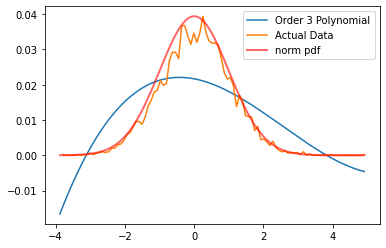

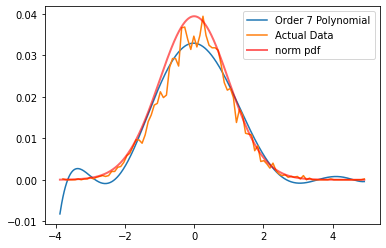

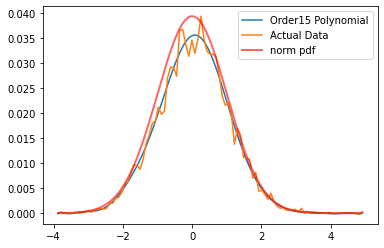

In [115]:
x = np.linspace(min(y),
                max(y), 5000)


fd_basis3.plot(label='Order 3 Polynomial')
plt.plot(adj_bins,adj_n,label='Actual Data')

plt.plot(x, max(adj_n)*norm.pdf(x)/max(norm.pdf(x)),
       'r-', lw=2, alpha=0.6, label='norm pdf')
plt.legend()

fd_basis8.plot(label='Order 7 Polynomial')
plt.plot(adj_bins,adj_n,label='Actual Data')
plt.plot(x, max(adj_n)*norm.pdf(x)/max(norm.pdf(x)),
       'r-', lw=2, alpha=0.6, label='norm pdf')
plt.legend()

fd_basis16.plot(label='Order15 Polynomial')
plt.plot(adj_bins,adj_n,label='Actual Data')
plt.plot(x, max(adj_n)*norm.pdf(x)/max(norm.pdf(x)),
       'r-', lw=2, alpha=0.6, label='norm pdf')

plt.legend()
plt.show()

Functional Representation via Trig Interpolation
- Much stronger with less basis functions , note this is inherently based on our one observed sample

In [116]:
fd = skfda.FDataGrid(data_matrix=adj_n, grid_points=adj_bins)
basis = skfda.representation.basis.Fourier((-3, 3), n_basis=3)

smoother = skfda.preprocessing.smoothing.BasisSmoother(basis,method='cholesky',return_basis=True)
fourier_basis = smoother.fit_transform(fd)
coeff=fourier_basis.coefficients.round(2)[0]
coeff

array([0.03, 0.01, 0.03])

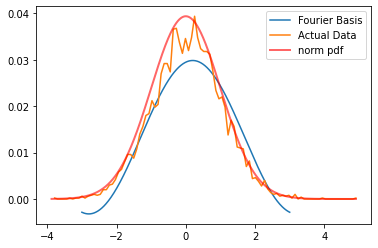

In [117]:
fourier_basis.plot(label='Fourier Basis')
plt.plot(adj_bins,adj_n,label='Actual Data')
plt.plot(x, max(adj_n)*norm.pdf(x)/max(norm.pdf(x)),
       'r-', lw=2, alpha=0.6, label='norm pdf')
plt.legend()
plt.show()